In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"


In [ ]:
titanic_df = pd.read_csv(url)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(f"How much missing value is there in each column?: {titanic_df.isna().sum()}")

How much missing value is there in each column?: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "ticks")
plt.style.use("fivethirtyeight")

**Who were the passengers on the titanic ?**

<ipython-input-5-77309673105c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Sex", data = titanic_df, kind = "count", palette ={"male": "lightgreen", "female": "orange"}) #helps with categorical plotting


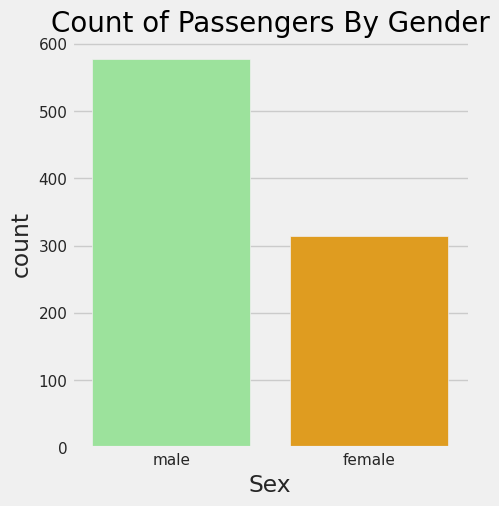

In [ ]:
sns.catplot(x = "Sex", data = titanic_df, kind = "count", palette ={"male": "lightgreen", "female": "orange"}) #helps with categorical plotting

plt.title("Count of Passengers By Gender", {"fontsize": 20, "color": "black"})
plt.show()

<ipython-input-6-2153eb43ce1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Sex", data = titanic_df, kind = "count", palette ="pastel") #helps with categorical plotting


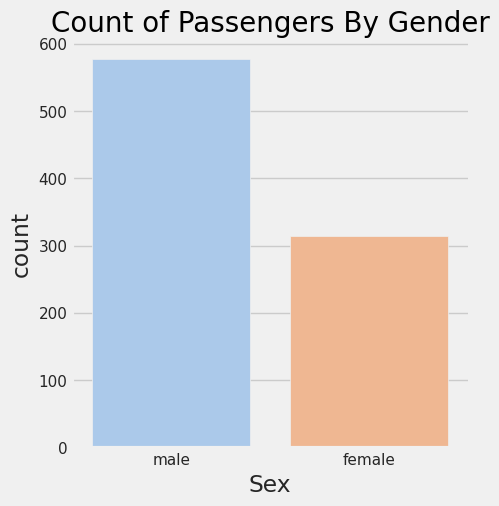

In [ ]:
sns.catplot(x = "Sex", data = titanic_df, kind = "count", palette ="pastel") #helps with categorical plotting

plt.title("Count of Passengers By Gender", {"fontsize": 20, "color": "black"})
plt.show()

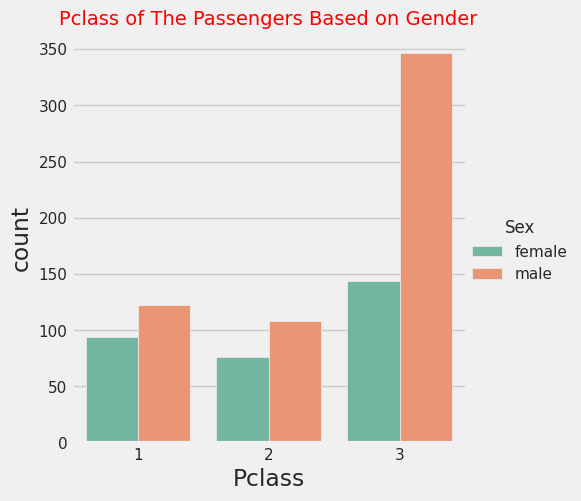

In [ ]:
sns.catplot(x = "Pclass", data = titanic_df, hue = "Sex", kind = "count", palette = "Set2")

plt.title("Pclass of The Passengers Based on Gender", {"fontsize": 14, "color": "red"})
plt.show()

**Create a new column "Person" in which every person under 16 is children**

In [ ]:
titanic_df["Person"] = titanic_df.Sex
titanic_df.loc[titanic_df["Age"] < 16, "Person"] = "Child"


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [ ]:
titanic_df.Person.unique()

array(['male', 'female', 'Child'], dtype=object)

In [ ]:
titanic_df.Person.value_counts()

,count
Person,
male,537
female,271
Child,83


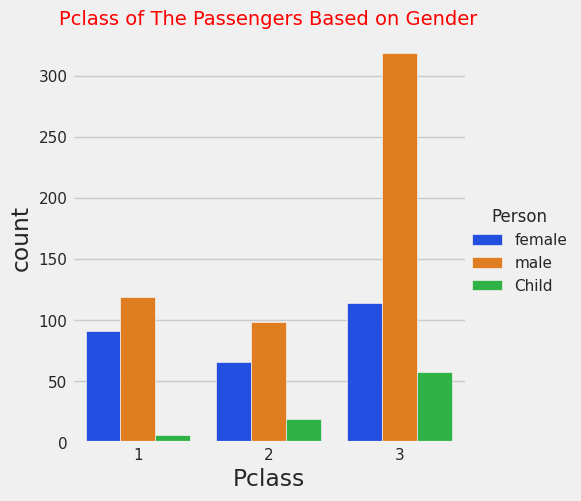

In [ ]:
sns.catplot(x = "Pclass", data = titanic_df, hue = "Person", kind = "count", palette = "bright")

plt.title("Pclass of The Passengers Based on Gender", {"fontsize": 14, "color": "red"})
plt.show()

<Axes: >

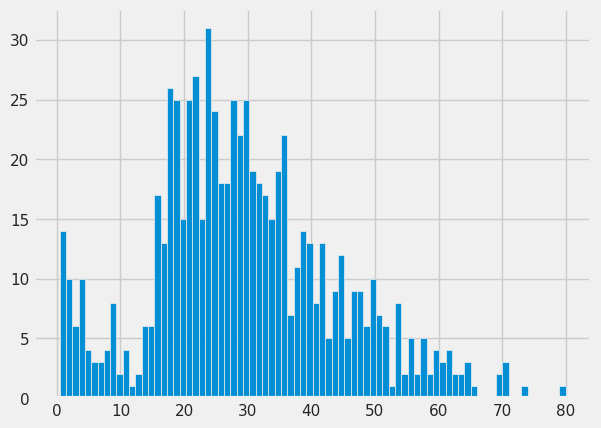

In [ ]:
titanic_df.Age.hist(bins = 80)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


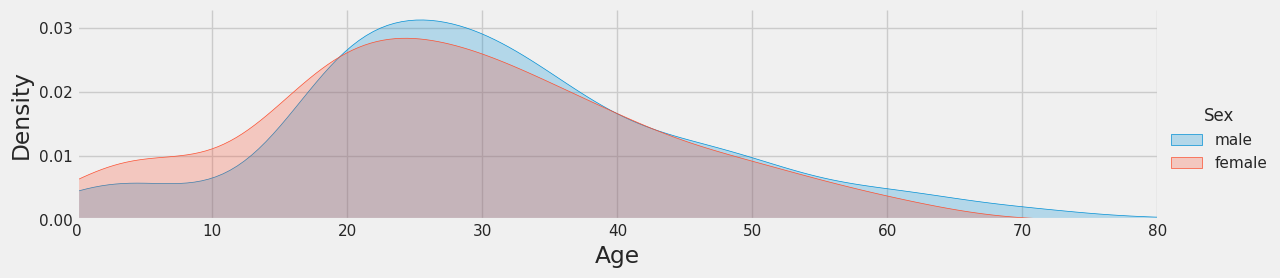

In [ ]:
fig = sns.FacetGrid(titanic_df, hue = "Sex", aspect = 4)
fig.map(sns.kdeplot, "Age", shade = True )

oldest = titanic_df["Age"].max()

fig.set(xlim = (0, oldest))
fig.add_legend()

**What deck were the passengers on and how does that relate to their class**

In [ ]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female


In [ ]:
titanic_df["Cabin"].isnull().sum()

687

In [ ]:
deck = titanic_df["Cabin"].dropna()
deck

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103
...,...
871,D35
872,B51 B53 B55
879,C50
887,B42


<ipython-input-18-113159aa4ea2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Cabin", data = cabin_df, kind = "count", palette = "bright")


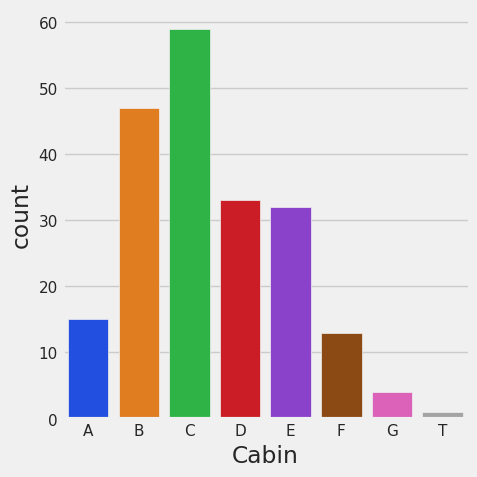

In [ ]:
levels = []

for level in deck:
  levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ["Cabin"]
cabin_df.sort_values(by = "Cabin", inplace = True)
sns.catplot(x = "Cabin", data = cabin_df, kind = "count", palette = "bright")

<ipython-input-19-2a671298d056>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Cabin", data = cabin_df, kind = "count", palette = "summer")


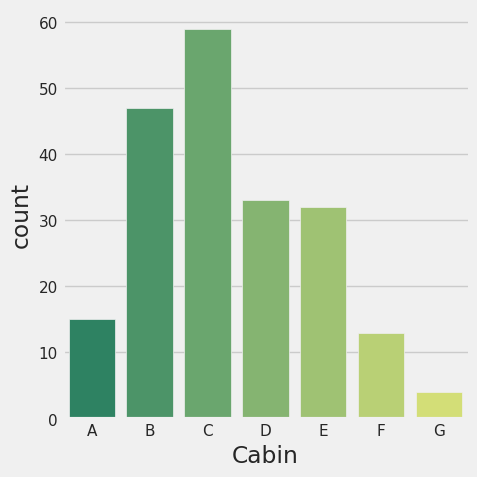

In [ ]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]
sns.catplot(x = "Cabin", data = cabin_df, kind = "count", palette = "summer")

**Where did the passengers come from**

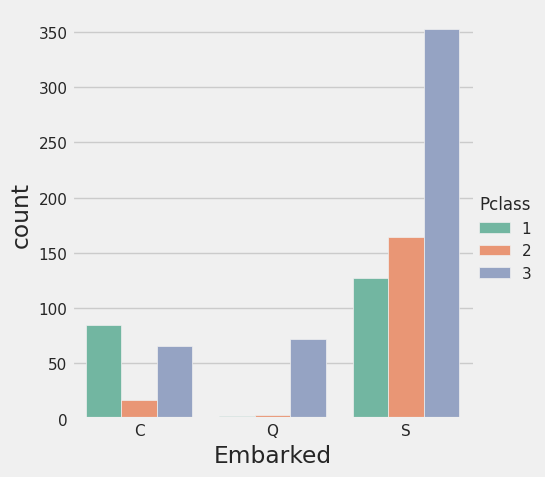

In [ ]:
sns.catplot(x = "Embarked", data = titanic_df, hue = "Pclass", kind = "count", order = ["C", "Q", "S"], palette = "Set2")

In [ ]:
titanic_df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


**Who was alone and who was with family?**


In [ ]:
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch
titanic_df.Alone.value_counts()

,count
Alone,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [ ]:
titanic_df.loc[titanic_df["Alone"] > 0, "Alone"] = "With Family"
titanic_df.loc[titanic_df["Alone"] == 0, "Alone"] = "Alone"

<ipython-input-23-d9cda19d569f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df.loc[titanic_df["Alone"] > 0, "Alone"] = "With Family"


In [ ]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family


<ipython-input-25-f799430b2e7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Alone", data = titanic_df, kind = "count", palette = "Blues", order = ["Alone", "With Family"])


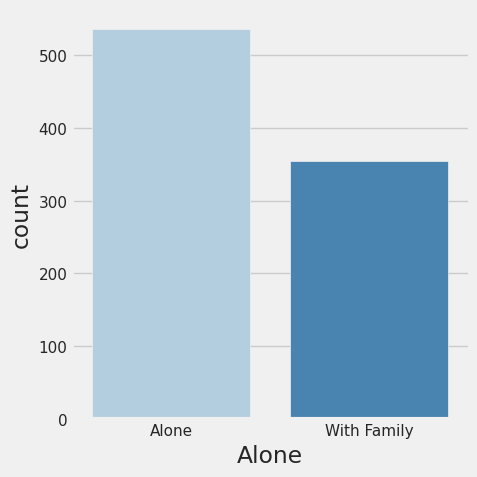

In [ ]:
sns.catplot(x = "Alone", data = titanic_df, kind = "count", palette = "Blues", order = ["Alone", "With Family"])

**What factors helped someone survive the sinking**
1st plot= survival 0 should be no 1 be Yes, plt,count






2. x = pclass, kind = 👇

3. hue = person, Pclass survived

<ipython-input-26-2bffb1d3a207>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Survivor", data = titanic_df, kind = "count", palette = "pastel")


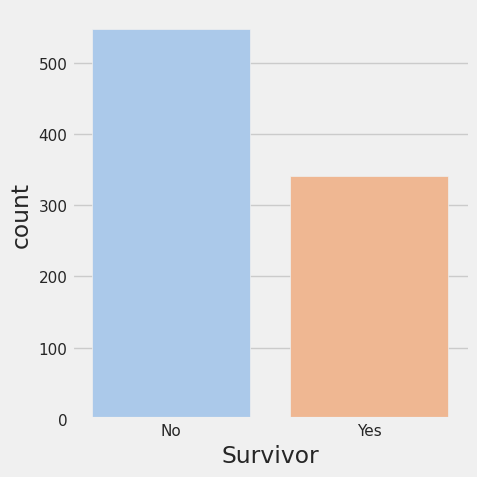

In [ ]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "No", 1: "Yes"})
sns.catplot(x = "Survivor", data = titanic_df, kind = "count", palette = "pastel")

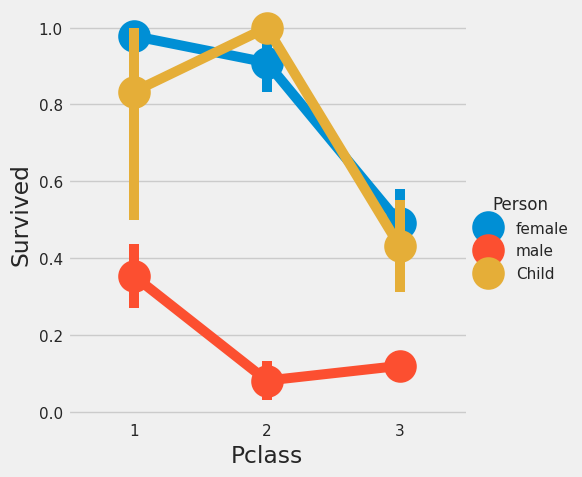

In [ ]:
sns.catplot(x = "Pclass", y= "Survived", data = titanic_df, hue = "Person", kind = "point")

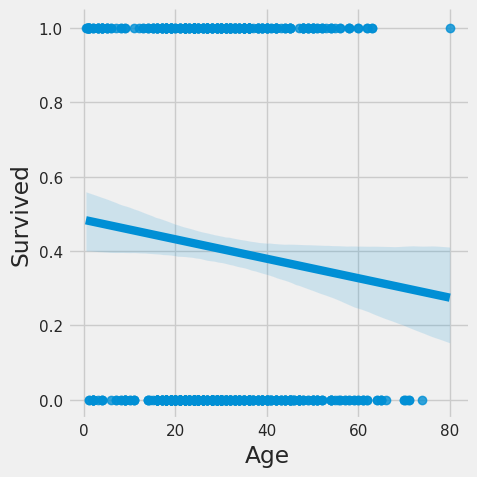

In [ ]:
sns.lmplot(x = "Age", y ="Survived", data = titanic_df)

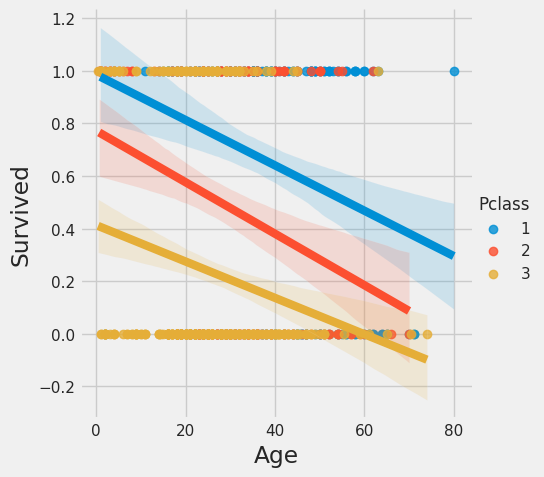

In [ ]:
sns.lmplot(x = "Age", y ="Survived", data = titanic_df, hue = "Pclass")

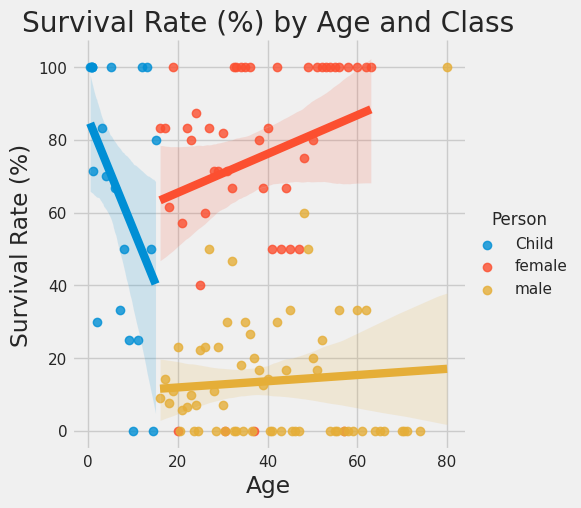

In [ ]:
survival_rate = titanic_df.groupby(["Age", "Person"])["Survived"].mean().reset_index()
survival_rate["Survived"] *= 100 #Convert to percentage

#Plotting with lmplot
sns.lmplot(x = "Age", y = "Survived", hue = "Person", data = survival_rate)
plt.title("Survival Rate (%) by Age and Class")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Age")
plt.show()

* Did the deck have an effect on the passengers survival rate? Did this answer match up with your intution?

* Did having family member increase the odds of surviving the crash?

In [ ]:
titanic_df["Deck"] = titanic_df["Cabin"].str[0]
titanic_df["Deck"] = titanic_df["Deck"].fillna("Unknown")

titanic_df["Survivor"] = titanic_df["Survived"].map({"No": 0, "Yes": 1})

deck_survivor_rate = titanic_df.groupby("Deck")["Survived"].mean().reset_index()
deck_survivor_rate

,Deck,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000
8,Unknown,0.299854


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=deck_survivor_rate, x='deck', y='survived', palette='coolwarm')
plt.title('Survival Rate by Deck')
plt.ylabel('Survival Rate')
plt.xlabel('Deck')
plt.show()

ValueError: Could not interpret value `deck` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

Did having a family member increased the odds of surviving the crash?

<ipython-input-38-34ba560c8601>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=deck_survivor_rate, x='Deck', y='Survivor', palette='coolwarm')


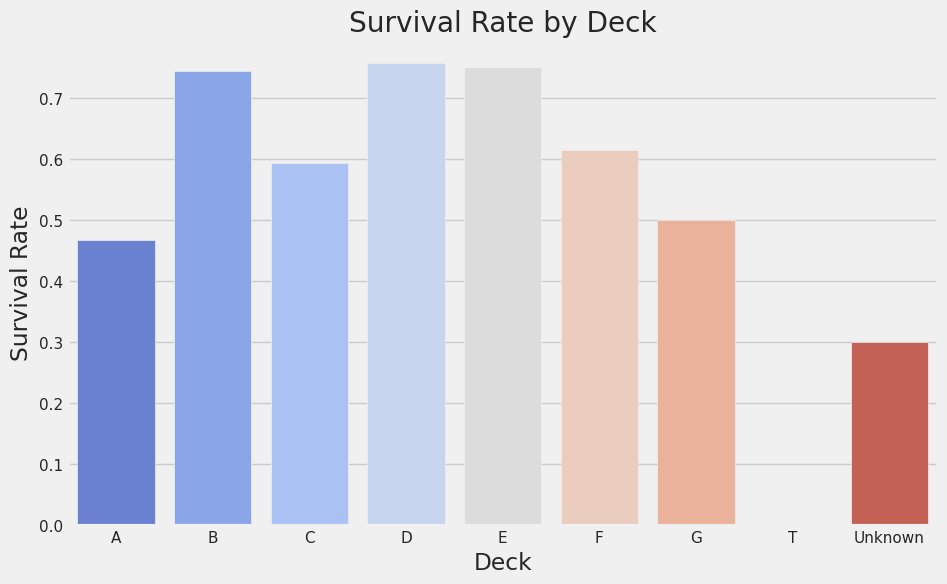

In [ ]:
# Extract the first letter of the Cabin to create the Deck column
titanic_df["Deck"] = titanic_df["Cabin"].str[0]

# Replace missing Deck values with 'Unknown'
titanic_df["Deck"] = titanic_df["Deck"].fillna("Unknown")

# Convert Survived column to a numeric Survivor column (0 for 'No', 1 for 'Yes')
titanic_df["Survivor"] = titanic_df["Survived"].map({0: 0, 1: 1})

# Calculate the survival rate by deck
deck_survivor_rate = titanic_df.groupby("Deck")["Survivor"].mean().reset_index()

# Plot the survival rate by deck
plt.figure(figsize=(10, 6))
sns.barplot(data=deck_survivor_rate, x='Deck', y='Survivor', palette='coolwarm')
plt.title('Survival Rate by Deck')
plt.ylabel('Survival Rate')
plt.xlabel('Deck')
plt.show()


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Person       891 non-null    object 
 13  Alone        891 non-null    object 
 14  Survivor     891 non-null    int64  
 15  Deck         891 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 111.5+ KB


In [ ]:
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']
family_survivor_rate = titanic_df.groupby('family_size')['Survived'].mean().reset_index()
family_survivor_rate

,family_size,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


<ipython-input-44-f8be2cbc3b0e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_survivor_rate, x='family_size', y='Survived', palette='pastel')


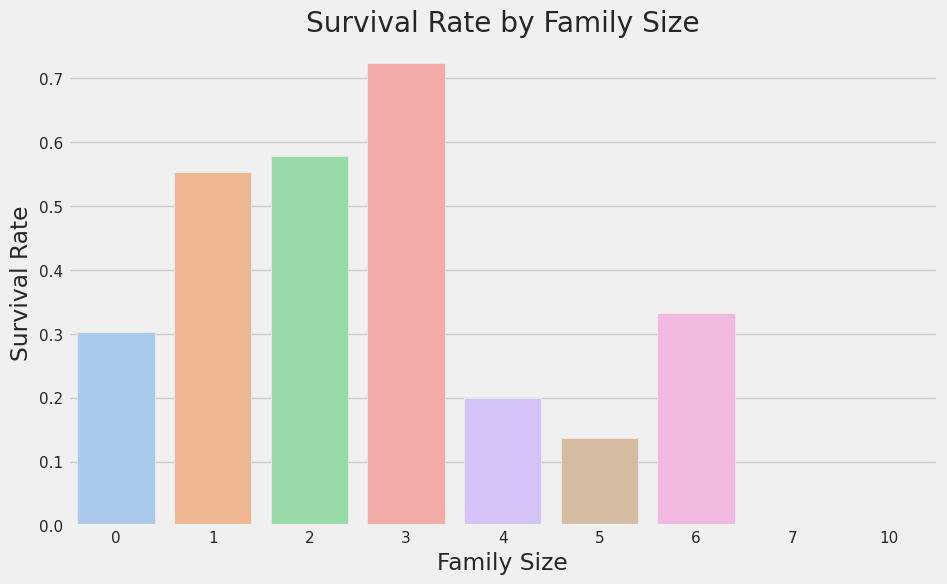

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=family_survivor_rate, x='family_size', y='Survived', palette='pastel')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()